**Qualitative Analysis of Validation Responses**

In [1]:
import json
import pandas as pd


def get_df_stats(model_name: str):

    data_file = f"../data/results/without/all_dependencies_without_{model_name}.json"
    baseline_file = "../data/results/all_dependencies.csv"

    with open(data_file, "r", encoding="utf-8") as src:
        data = json.load(src)

    df = pd.read_csv(baseline_file)

    response_rating = []
    classification = []
    rationale = []
    plan = []
    uncertainty = []
    skipped = 0

    for entry, (index, row) in zip(data, df.iterrows()):

        assert entry["index"] == index
        response_dict = None
        isDependency = None

        if "responses" in entry:
            response = entry["responses"][0]
        else:
            response = entry["response"]

        try:
            if "responses" in entry:
                response = entry["responses"][0]
            else:
                response = entry["response"]
            response_dict = json.loads(response, strict=False)
            isDependency = response_dict["isDependency"]
            plan_str = response_dict["plan"]
            rationale_str = response_dict["rationale"]
            uncertainty_str = response_dict["uncertainty"]
        except (json.JSONDecodeError, KeyError):
            response_rating.append("None")
            classification.append("None")
            plan.append("None")
            rationale.append("None")
            uncertainty.append("None")
            skipped += 1
            continue

        rating = row["final_rating"]
        
        if str(rating).lower() == "borderline":
            if isDependency:
                response_rating.append(str(isDependency))
                classification.append("TP")
                plan.append(plan_str)
                rationale.append(rationale_str)
                uncertainty.append(uncertainty_str)
            if not isDependency:
                response_rating.append(str(isDependency))
                classification.append("TN")
                plan.append(plan_str)
                rationale.append(rationale_str)
                uncertainty.append(uncertainty_str)

        # FP: The LLM validates a dependency as correct, but the dependency is actually incorrect
        if isDependency and str(rating).lower() == "false":
            response_rating.append(str(isDependency))
            classification.append("FP")
            plan.append(plan_str)
            rationale.append(rationale_str)
            uncertainty.append(uncertainty_str)


        # FN: The LLM validates a dependency as incorrect, but the dependency is actually correct
        if not isDependency and  str(rating).lower() == "true":
            response_rating.append(str(isDependency))
            classification.append("FN")
            plan.append(plan_str)
            rationale.append(rationale_str)
            uncertainty.append(uncertainty_str)

        # TP: The LLM validates a dependency as correct and the dependency is correct
        if isDependency and str(rating).lower() == "true":
            response_rating.append(str(isDependency))
            classification.append("TP")
            plan.append(plan_str)
            rationale.append(rationale_str)
            uncertainty.append(uncertainty_str)

        # TN: The LLM validates a dependency as incorrect and the dependency is incorrect
        if not isDependency and str(rating).lower() == "false":
            response_rating.append(str(isDependency))
            classification.append("TN")
            plan.append(plan_str)
            rationale.append(rationale_str)
            uncertainty.append(uncertainty_str)


    print(f"Skipped {skipped} entries in file {data_file}.")
    df[f"response_rating"] = response_rating
    df["classification"] = classification
    df["plan"] = plan
    df["rationale"] = rationale
    df["uncertainty"] = uncertainty

    return df


model_names = ["gpt-3.5-turbo-0125", "gpt-4o-2024-05-13", "llama3:70b", "llama3:8b"]


for name in model_names:
    df = get_df_stats(model_name=name)
    print(df.columns)
    df.to_csv(f"../data/analysis/without/{name}.csv", index=False)


Skipped 0 entries in file ../data/results/without/all_dependencies_without_gpt-3.5-turbo-0125.json.
Index(['dependency_category', 'link_str', 'project', 'option_name',
       'option_value', 'option_type', 'option_file', 'option_technology',
       'dependent_option_name', 'dependent_option_value',
       'dependent_option_type', 'dependent_option_file',
       'dependent_option_technology', 'config_type', 'rating', 'final_rating',
       'final_category', 'sub_category', 'explanation', 'response_rating',
       'classification', 'plan', 'rationale', 'uncertainty'],
      dtype='object')
Skipped 0 entries in file ../data/results/without/all_dependencies_without_gpt-4o-2024-05-13.json.
Index(['dependency_category', 'link_str', 'project', 'option_name',
       'option_value', 'option_type', 'option_file', 'option_technology',
       'dependent_option_name', 'dependent_option_value',
       'dependent_option_type', 'dependent_option_file',
       'dependent_option_technology', 'config_typ

In [4]:
import pandas as pd

model_names = ['gpt-4o-2024-05-13', 'gpt-3.5-turbo-0125', 'llama3:70b', 'llama3:8b']

df_base = pd.read_csv("../data/results/all_dependencies.csv")

for name in model_names:
    file_name = f"../data/analysis/without/{name}.csv"
    df_model = pd.read_csv(file_name)

    classification = df_model["classification"].to_list()
    rationale = df_model["rationale"].to_list()
    uncertainty = df_model["uncertainty"].to_list()

    df_base[f"{name}_classification"] = classification
    df_base[f"{name}_rationale"] = rationale
    df_base[f"{name}_uncertainty"] = uncertainty


df_base.to_csv("../data/analysis/without/all.csv", index=False)

print(len(df_base))


500


Counter({'Multi-Maven-Modules': 113, 'Libraries': 74, 'Version Numbers': 41, 'Others': 34, 'Independent Components': 18, 'Port': 14, 'Generic Names': 13, 'Datasource': 12, 'Boolean': 6, 'Integers': 3})
Counter({'Project Inheritance': 71, 'Maven Dependency': 53, 'POM Version': 19, 'Port': 14, 'Others': 13, 'Names': 13, 'Maven Plugin': 12, 'Datasource': 12, 'Different Dockerfiles': 12, 'Project Aggregation': 10, 'Project Version': 10, 'Maven Properties': 9, 'Module as Dependency': 9, 'Project Structure': 7, 'Library': 7, 'Packaging Format': 7, 'Boolean': 6, 'Logging Level': 6, 'Different Services': 6, 'Maven Plugins': 5, 'JAVA Version': 5, 'Dependency Scope': 4, 'Executable': 3, 'Number': 3, 'Health Monitoring': 2, 'URL Handling': 2, 'Logging': 2, 'Networks': 2, 'Eureka': 1, 'Encoding': 1, 'Commands': 1, 'Environments': 1})


/tmp/ipykernel_1943/3646594527.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_failures['FP_FN_count'] = df_failures[model_columns].apply(lambda row: row.isin(['FP', 'FN']).sum(), axis=1)


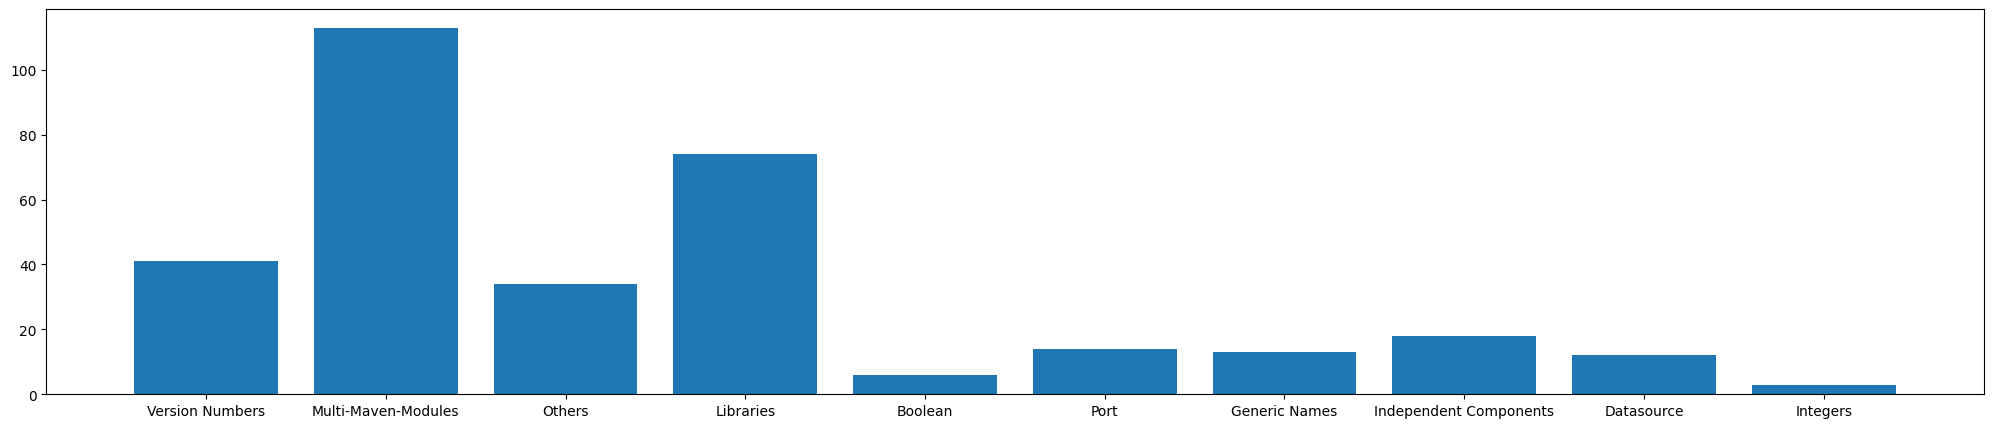

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

model_columns = ['gpt-4o-2024-05-13_classification', 'gpt-3.5-turbo-0125_classification', 'llama3:70b_classification', 'llama3:8b_classification']

failure_ids = set()


for name in model_names:
    file_name = f"../data/analysis/without/{name}.csv"
    df_model = pd.read_csv(file_name)

    for index, row in df_model.iterrows():
        if row["classification"] == "FP" or row["classification"] == "FN":
            failure_ids.add(index)


df_failures = df_base.iloc[list(failure_ids)]
df_failures['FP_FN_count'] = df_failures[model_columns].apply(lambda row: row.isin(['FP', 'FN']).sum(), axis=1)

df_failures.to_csv("../data/analysis/without/failures.csv", index=False)


categories = df_failures["final_category"].to_list()
sub_categories = df_failures["sub_category"].to_list()

category_counter = Counter(categories)
sub_category_counter = Counter(sub_categories)

print(category_counter)
print(sub_category_counter)

plt.figure(figsize=(25, 5)) 
plt.bar(category_counter.keys(), category_counter.values())
plt.show()


In [4]:
import pandas as pd

df = pd.read_csv("../data/analysis/without/all.csv")

# List of model columns to check
model_columns = ['gpt-4o-2024-05-13_classification', 'gpt-3.5-turbo-0125_classification', 'llama3:70b_classification', 'llama3:8b_classification']

# Create a boolean mask where True indicates the presence of 'FP' or 'FN' in any of the specified model columns
#mask = df[model_columns].apply(lambda x: x.isin(['FP', 'FN']), axis=1).any(axis=1)

# Filter the dataframe using the mask
#filtered_df_all = df[mask]

df['FP_FN_count'] = df[model_columns].apply(lambda row: row.isin(['FP', 'FN']).sum(), axis=1)
df['TP_TN_count'] = df[model_columns].apply(lambda row: row.isin(['TP', 'TN']).sum(), axis=1)

#sorted_df_all =  filtered_df_all.sort_values(by='FP_FN_count', ascending=False)

# Save the filtered dataframe if needed
df.to_csv('../data/analysis/without/all.csv', index=False)

In [5]:
import pandas as pd
from collections import Counter

df_all = pd.read_csv('../data/analysis/without/all.csv')

failure_count = df_all["FP_FN_count"].to_list()
success_count = df_all["TP_TN_count"].to_list()

failure_counter = Counter(failure_count)
success_counter = Counter(success_count)

print(len(df_all))

print("Failure counter: ", failure_counter, sum(failure_counter.values()))
print("Success counter: ", success_counter, sum(success_counter.values()))

500
Failure counter:  Counter({0: 172, 1: 162, 2: 107, 3: 55, 4: 4}) 500
Success counter:  Counter({4: 165, 3: 157, 2: 113, 1: 60, 0: 5}) 500


In [6]:
import pandas as pd

df = pd.read_csv("../data/analysis/without/all.csv")

# List of model columns to check
model_columns = ['gpt-4o-2024-05-13_classification', 'gpt-3.5-turbo-0125_classification', 'llama3:70b_classification', 'llama3:8b_classification']

for column in model_columns:
    rating_counts = df[column].value_counts()

    print(column)
    print(rating_counts)
    print(sum(k for k in rating_counts.to_dict().values()))

gpt-4o-2024-05-13_classification
gpt-4o-2024-05-13_classification
TN    282
TP    127
FN     76
FP     15
Name: count, dtype: int64
500
gpt-3.5-turbo-0125_classification
gpt-3.5-turbo-0125_classification
TN    209
TP    137
FP     88
FN     66
Name: count, dtype: int64
500
llama3:70b_classification
llama3:70b_classification
TN    234
TP    112
FN     91
FP     63
Name: count, dtype: int64
500
llama3:8b_classification
llama3:8b_classification
TP    158
TN    158
FP    126
FN     32
Name: count, dtype: int64
474


In [7]:
import pandas as pd
from collections import Counter

baseline_file = "../data/results/all_dependencies.csv"

df = pd.read_csv(baseline_file)

categories = df["final_category"].to_list()

categories = [x.lower() for x in categories]

category_counter = Counter(categories)

category_counter

Counter({'multi-maven-modules': 146,
         'libraries': 115,
         'boolean': 57,
         'others': 48,
         'version numbers': 44,
         'generic names': 29,
         'independent components': 20,
         'datasource': 19,
         'port': 16,
         'integers': 6})

In [8]:
from typing import List
import pandas as pd

def get_category_stats(category_names: List, model_name: str):

    file_name = f"../data/analysis/without/{model_name}.csv"
    df = pd.read_csv(file_name)

    tp = []
    fp = []
    tn = []
    fn = []

    for category_name in category_names:

        df_category = df[df['final_category'].str.lower() == str(category_name)]

        #print(df_category["classification"].unique())

        rating_counts = df_category['classification'].value_counts().to_dict()

        #print(type(rating_counts))
        #print(df_category)
        #print(rating_counts)

        tp.append(rating_counts["TP"] if "TP" in rating_counts else "-")
        tn.append(rating_counts["TN"] if "TN" in rating_counts else "-" )
        fp.append(rating_counts["FP"] if "FP" in rating_counts else "-")
        fn.append(rating_counts["FN"] if "FN" in rating_counts else "-")

    
    data = {
        "category_name": category_names,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    }

    df = pd.DataFrame(data)

    #print(df)

    return df


model_names = ['gpt-4o-2024-05-13', 'gpt-3.5-turbo-0125', 'llama3:70b', 'llama3:8b']
category_names = list(category_counter.keys())
dfs = []

for model_name in model_names:
    print("Model: ", model_name)
    df = get_category_stats(category_names=category_names, model_name=model_name)
    dfs.append(df)

df_all = pd.concat(dfs)

df_all

Model:  gpt-4o-2024-05-13
Model:  gpt-3.5-turbo-0125
Model:  llama3:70b
Model:  llama3:8b


,category_name,TP,TN,FP,FN
0,version numbers,9,16,3,16
1,boolean,-,57,-,-
2,multi-maven-modules,76,21,9,40
3,others,9,38,1,-
4,libraries,23,71,1,20
5,port,5,11,-,-
6,generic names,-,28,1,-
7,datasource,5,14,-,-
8,independent components,-,20,-,-
9,integers,-,6,-,-


In [9]:
from collections import Counter
import pandas as pd

model_names = ['gpt-4o-2024-05-13', 'gpt-3.5-turbo-0125', 'llama3:70b', 'llama3:8b']

data = []

for model_name in model_names:
    print("Model: ", model_name)
    file_name = f"../data/analysis/without/{model_name}.csv"
    df_model = pd.read_csv(file_name)

    df_failures = df_model[df_model["classification"].isin(["FP", "FN"])]

    technologies_failures = df_failures["option_technology"].to_list() 

    counter = Counter(technologies_failures)

    print("Technologies Failures: ", counter)


    model_data = {"model_name": model_name}
    model_data.update({k: v for k, v in counter.items()})
    data.append(model_data)


df = pd.DataFrame(data)
df


Model:  gpt-4o-2024-05-13
Technologies Failures:  Counter({'maven': 90, 'spring': 1})
Model:  gpt-3.5-turbo-0125
Technologies Failures:  Counter({'maven': 107, 'spring': 20, 'docker-compose': 10, 'docker': 9, 'nodejs': 7, 'tsconfig': 1})
Model:  llama3:70b
Technologies Failures:  Counter({'maven': 121, 'docker-compose': 14, 'nodejs': 7, 'docker': 7, 'spring': 5})
Model:  llama3:8b
Technologies Failures:  Counter({'maven': 92, 'spring': 23, 'docker-compose': 22, 'docker': 15, 'nodejs': 5, 'tsconfig': 1})


,model_name,maven,spring,nodejs,docker-compose,docker,tsconfig
0,gpt-4o-2024-05-13,90,1,NaN,NaN,NaN,NaN
1,gpt-3.5-turbo-0125,107,20,7.0,10.0,9.0,1.0
2,llama3:70b,121,5,7.0,14.0,7.0,NaN
3,llama3:8b,92,23,5.0,22.0,15.0,1.0


In [10]:
import pandas as pd

model_names = ['gpt-4o-2024-05-13', 'gpt-3.5-turbo-0125', 'llama3:70b', 'llama3:8b']


for model_name in model_names:
    intra = 0
    cross = 0
    print("Model: ", model_name)
    file_name = f"../data/analysis/without/{model_name}.csv"
    df_model = pd.read_csv(file_name)

    df_failures = df_model[df_model["classification"].isin(["FP", "FN"])]

    technologies_a = df_failures["option_technology"].to_list() 
    technologies_b = df_failures["dependent_option_technology"].to_list() 



    for x, y in zip(technologies_a, technologies_b):
        if x.lower() == y.lower():
            intra += 1
        else:
            cross += 1
    
    print("Num intra-technology failures: ", intra)
    print("Num cross-technology failures: ", cross)


Model:  gpt-4o-2024-05-13
Num intra-technology failures:  91
Num cross-technology failures:  0
Model:  gpt-3.5-turbo-0125
Num intra-technology failures:  151
Num cross-technology failures:  3
Model:  llama3:70b
Num intra-technology failures:  150
Num cross-technology failures:  4
Model:  llama3:8b
Num intra-technology failures:  148
Num cross-technology failures:  10
